In [1]:
import rebound

In [2]:
sim = rebound.Simulation()

In [3]:
sim.add(["Sun", "Mercury", "Venus", "Earth", "Mars", "Jupiter", "Saturn", "Uranus", "Neptune"])

Searching NASA Horizons for 'Sun'... Found: Sun (10).
Searching NASA Horizons for 'Mercury'... Found: Mercury Barycenter (199).
Searching NASA Horizons for 'Venus'... Found: Venus Barycenter (299).
Searching NASA Horizons for 'Earth'... Found: Earth-Moon Barycenter (3).
Searching NASA Horizons for 'Mars'... Found: Mars Barycenter (4).
Searching NASA Horizons for 'Jupiter'... Found: Jupiter Barycenter (5).
Searching NASA Horizons for 'Saturn'... Found: Saturn Barycenter (6).
Searching NASA Horizons for 'Uranus'... Found: Uranus Barycenter (7).
Searching NASA Horizons for 'Neptune'... Found: Neptune Barycenter (8).


In [4]:
sim.add("99942")

Searching NASA Horizons for '99942'... Found: 99942 Apophis (2004 MN4).


/home/ridlo/anaconda2/lib/python2.7/site-packages/rebound/horizons.py:127: RuntimeWarning: Warning: Mass cannot be retrieved from NASA HORIZONS. Set to 0.
  warnings.warn("Warning: Mass cannot be retrieved from NASA HORIZONS. Set to 0.", RuntimeWarning)


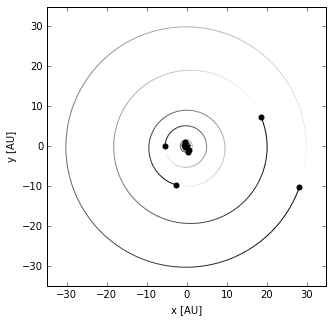

In [5]:
%matplotlib inline

fig = rebound.OrbitPlot(sim, trails=True, unitlabel="[AU]")

In [6]:
sim.dt = 0.001

In [7]:
import numpy as np

Noutputs = 100000
year = 2.*np.pi # One year in units where G=1
times = np.linspace(0.,100.*year, Noutputs)
x = np.zeros((2,Noutputs))
y = np.zeros((2,Noutputs))
z = np.zeros((2,Noutputs))
a = np.zeros((2,Noutputs))
e = np.zeros((2,Noutputs))
inc = np.zeros((2,Noutputs))

In [8]:
sim.integrator = "ias15" # IAS15 is the default integrator, so we actually don't need this line
sim.move_to_com()        # We always move to the center of momentum frame before an integration
ps = sim.particles       # ps is now an array of pointers and will change as the simulation runs

for i,time in enumerate(times):
    sim.integrate(time)
    x[0][i] = ps[3].x   # This stores the data which allows us to plot it later
    y[0][i] = ps[3].y
    z[0][i] = ps[3].z
    a[0][i] = ps[3].a   # This stores the data which allows us to plot it later
    e[0][i] = ps[3].e
    inc[0][i] = ps[3].inc
    
    x[1][i] = ps[9].x
    y[1][i] = ps[9].y
    z[1][i] = ps[9].z
    a[1][i] = ps[9].a
    e[1][i] = ps[9].e
    inc[1][i] = ps[9].inc

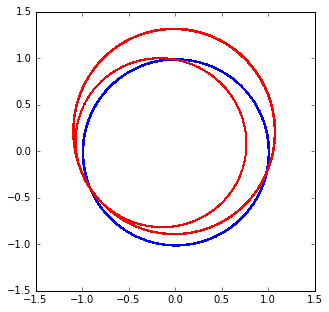

In [9]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(5,5))
ax = plt.subplot(111)

ax.set_xlim([-1.5,1.5])
ax.set_ylim([-1.5,1.5])
plt.plot(x[0], y[0], 'b,')
plt.plot(x[1], y[1], 'r,')
plt.show()

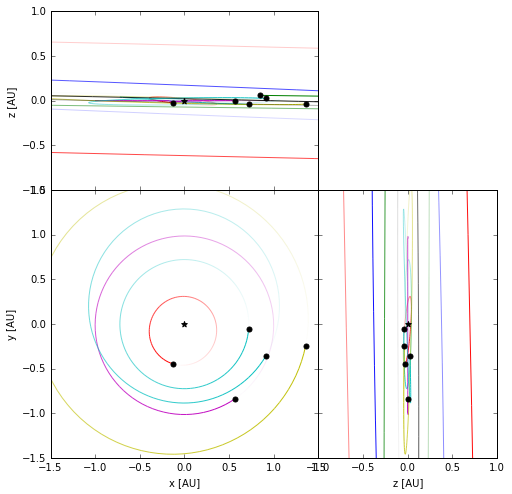

In [10]:
fig = rebound.OrbitPlot(sim,slices=True,color=True,unitlabel="[AU]",lim=1.5,limz=1)

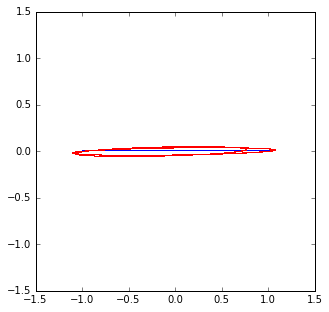

In [11]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(5,5))
ax = plt.subplot(111)

ax.set_xlim([-1.5,1.5])
ax.set_ylim([-1.5,1.5])
plt.plot(x[0], z[0], 'b,')
plt.plot(x[1], z[1], 'r,')
plt.show()

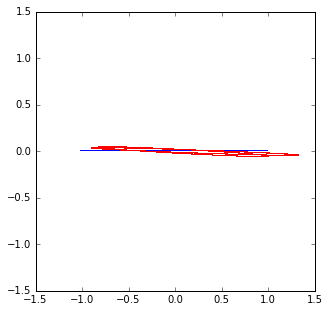

In [12]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(5,5))
ax = plt.subplot(111)

ax.set_xlim([-1.5,1.5])
ax.set_ylim([-1.5,1.5])
plt.plot(y[0], z[0], 'b,')
plt.plot(y[1], z[1], 'r,')
plt.show()

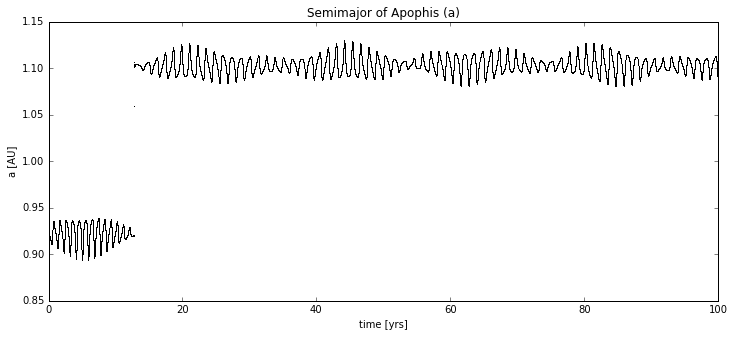

In [13]:
fig = plt.figure(figsize=(12,5))
ax = plt.subplot(111)

plt.plot(times/year, a[1], 'k,')
ax.set_title("Semimajor of Apophis (a)")
ax.set_xlabel("time [yrs]")
ax.set_ylabel("a [AU]")
plt.show()

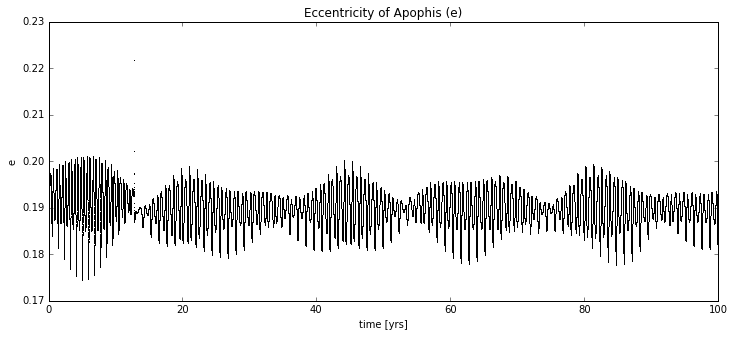

In [14]:
fig = plt.figure(figsize=(12,5))
ax = plt.subplot(111)

plt.plot(times/year, e[1], 'k,')
ax.set_title("Eccentricity of Apophis (e)")
ax.set_xlabel("time [yrs]")
ax.set_ylabel("e")
plt.show()

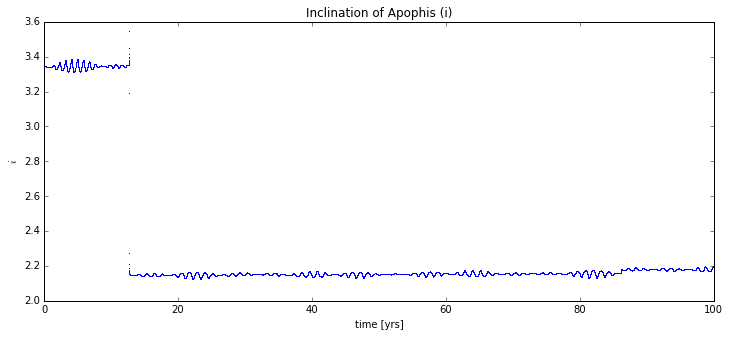

In [15]:
fig = plt.figure(figsize=(12,5))
ax = plt.subplot(111)

plt.plot(times/year, inc[1]*180./np.pi, 'b,')
ax.set_title("Inclination of Apophis (i)")
ax.set_xlabel("time [yrs]")
ax.set_ylabel(r"$i$")
plt.show()

Minimum distance (0.000273 AU) occured at time: 12.714127 years.


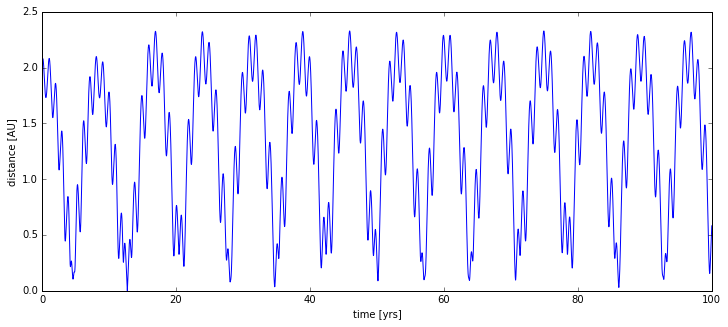

In [16]:
fig = plt.figure(figsize=(12,5))
ax = plt.subplot(111)

ax.set_xlabel("time [yrs]")
ax.set_ylabel("distance [AU]")

distance = np.sqrt(np.square(x[0]-x[1])+np.square(y[0]-y[1]))
plt.plot(times/year, distance);
closeencountertime = times[np.argmin(distance)]/year
print("Minimum distance (%f AU) occured at time: %f years." % (np.min(distance),closeencountertime))

In [17]:
import datetime
encounterdate = datetime.datetime.today() + datetime.timedelta(days=365.25*closeencountertime)
encounterdate.strftime("%Y-%m-%d %H:%M")

'2029-04-14 03:40'

In [18]:
ps[0].m

1.0

In [22]:
ps[3].m*1.98e30

6.02005664308483e+24